In [1]:
import mo_descriptor as md
import nn_frame as nn
import numpy as np
import subprocess
subprocess.run('export TF_INTRA_OP_PARALLELISM_THREADS=12', shell=True)

2022-08-31 14:35:16.114575: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-31 14:35:16.114620: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


CompletedProcess(args='export TF_INTRA_OP_PARALLELISM_THREADS=12', returncode=0)

In [2]:
x = np.linspace(-4, 4, 81)
y = np.linspace(-4, 4, 81)
train_y = np.log(np.outer(np.exp(np.square(x)), np.exp(-np.square(y))))
train_x = []
for ii, i in np.ndenumerate(train_y):
    idx = ii[0] * 81 + ii[1]
    train_x.append((np.array(ii)-40)*0.1)
train_x = np.array(train_x)
train_y = train_y.flatten()


In [3]:
setting = {'activation':'tanh', 'nn_shape':(240, 240, 240), 'batch_size':6561, 'training_steps':500000,\
'learning_rate': 0.02, 'decay_rate':0.95, 'decay_per_steps':1000, 'save_step':1000, 'drop_rate':0, 'save_path':'./save',\
'seed':None, 'debug_traj': True}
NN = nn.NN(setting_dict=setting)
NN.train(train_x,train_y)

2022-08-31 14:35:17.960504: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-31 14:35:17.960555: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-31 14:35:17.960592: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Bai-Group): /proc/driver/nvidia/version does not exist
2022-08-31 14:35:17.960917: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


training step:     0
loss:  50.6049042


/home/jingheng/ML_Coupling/nn_frame.py:161: RuntimeWarning: divide by zero encountered in true_divide
  error = np.mean((self.model(X, training=False).numpy()-Y)/Y)
/home/jingheng/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:178: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


training step:  1000
loss:  144.333252
training step:  2000
loss:  110.51091
training step:  3000
loss:  56.620491
training step:  4000
loss:  48.4010925
training step:  5000
loss:  47.7331772
training step:  6000
loss:  48.2777443
training step:  7000
loss:  48.4215813
training step:  8000
loss:  47.8758812
training step:  9000
loss:  46.7870522
training step: 10000
loss:  45.4369659
training step: 11000
loss:  43.6825
training step: 12000
loss:  41.6226273
training step: 13000
loss:  39.2094803
training step: 14000
loss:  38.1737251
training step: 15000
loss:  36.6201744
training step: 16000
loss:  34.2251434
training step: 17000
loss:  32.2640305
training step: 18000
loss:  30.4052544
training step: 19000
loss:  28.8031597
training step: 20000
loss:  26.5760441
training step: 21000
loss:  24.6246758
training step: 22000
loss:  22.8300247
training step: 23000
loss:  21.1246586
training step: 24000
loss:  19.5984669
training step: 25000
loss:  18.1385345
training step: 26000
loss:  16

2022-08-31 16:22:11.610242: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ./save/model/assets


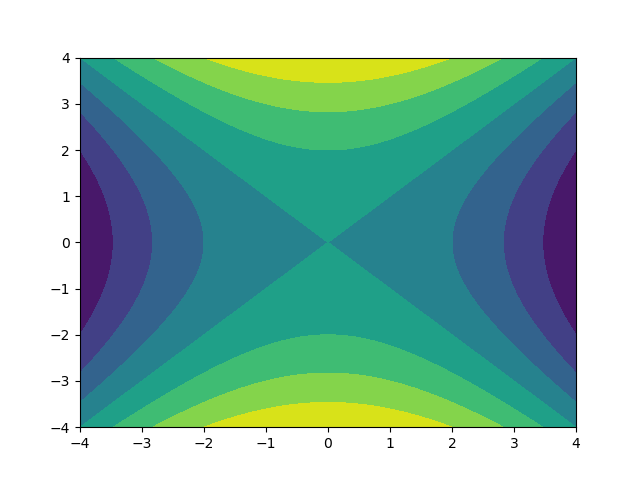

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib widget

x = np.linspace(-4, 4, 81)
y = np.linspace(-4, 4, 81)
X, Y = np.meshgrid(x, y)
Z = np.log(np.outer(np.exp(np.square(x)), np.exp(-np.square(y))))

fig = plt.figure()
ax = fig.add_subplot()
ax.contourf(X,Y,Z)

In [5]:
print(X[1][0])

-4.0
